In [13]:
from preprocessing_copy import preprocess_pipeline
from tensorflow.python.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# 이상치 데이터 평가
anomaly_file_path = "이상치데이터예제.csv"
seq_length = 4

In [ ]:
# 저장된 모델 로드
autoencoder = load_model('autoencoder_model2.h5')

In [22]:
# 데이터 전처리
X_anomaly = preprocess_pipeline(anomaly_file_path, seq_length)

In [ ]:
# 정상 데이터 로드 및 평가
X_normal = preprocess_pipeline("Dummy_02.csv", seq_length)
reconstructed_normal = autoencoder.predict(X_normal)
normal_reconstruction_errors = np.mean(np.abs(X_normal - reconstructed_normal), axis=(1, 2))

2776/2776 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [ ]:
# 모델 평가
reconstructed = autoencoder.predict(X_anomaly)
reconstruction_errors = np.mean(np.abs(X_anomaly - reconstructed), axis=(1, 2))  # MSE → MAE 적용
print("Reconstruction errors calculated.")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Reconstruction errors calculated.


In [25]:
# 정상 데이터 기반 threshold 설정 (3σ 적용)
threshold = np.mean(normal_reconstruction_errors) + np.std(normal_reconstruction_errors)

In [26]:
# epc_code별 이상치 개수 분석
anomalies = reconstruction_errors > threshold
df_anomaly = pd.read_csv(anomaly_file_path)
df_anomaly = df_anomaly.iloc[-len(X_anomaly):]  # 테스트 데이터에 해당하는 부분만 선택
df_anomaly["reconstruction_error"] = reconstruction_errors
df_anomaly["anomaly"] = anomalies

Number of anomalies detected: 319
001.8805843.584374.000000009: True
001.8805843.584374.000000010: True
001.8805843.584374.000000011: True
001.8805843.584374.000000012: True
001.8805843.584374.000000013: True
001.8805843.584374.000000014: True
001.8805843.584374.000000015: True
001.8805843.584374.000000016: True
001.8805843.584374.000000017: True
001.8805843.584374.000000018: True
001.8805843.584374.000000019: True
001.8805843.584374.000000020: True
001.8805843.584374.000000021: True
001.8805843.584374.000000022: True
001.8805843.584374.000000023: True
001.8805843.584374.000000024: True
001.8805843.584374.000000025: True
001.8805843.584374.000000026: True
001.8805843.584374.000000027: True
001.8805843.584374.000000028: True
001.8805843.584374.000000029: True
001.8805843.584374.000000030: True
001.8805843.584374.000000031: True
001.8805843.584374.000000032: True
001.8805843.584374.000000033: True
001.8805843.584374.000000034: True
001.8805843.584374.000000035: True
001.8805843.584374.00

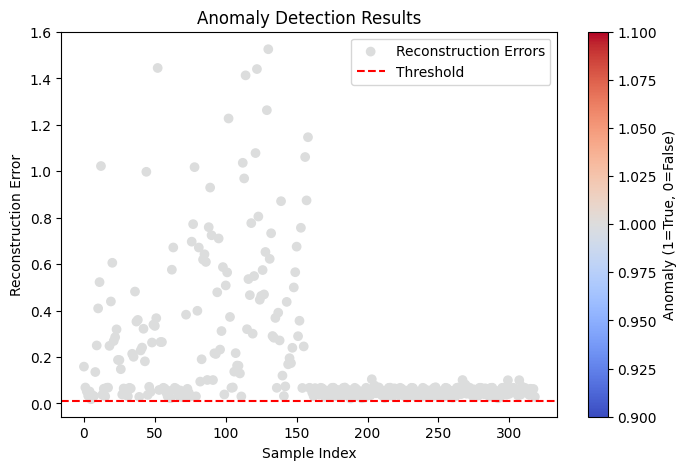

In [ ]:
# 이상치 탐지
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# epc_code별 이상치 개수 집계
epc_anomaly_counts = df_anomaly.groupby("epc_code")["anomaly"].sum()

# epc_code별 이상치 여부 출력
epc_anomaly_status = epc_anomaly_counts > 1
for epc_code, is_anomaly in epc_anomaly_status.items():
    print(f"{epc_code}: {is_anomaly}")

# epc_code별 이상치 포함 비율 출력
total_epc_codes = df_anomaly["epc_code"].nunique()
anomaly_epc_codes = epc_anomaly_counts[epc_anomaly_counts > 1].count()
print(f"이상치 포함 epc_code 비율: {anomaly_epc_codes / total_epc_codes:.2%}")

plt.figure(figsize=(8, 5))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, c=anomalies, cmap="coolwarm", label="Reconstruction Errors")
plt.axhline(threshold, color="red", linestyle="--", label="Threshold")
plt.colorbar(label="Anomaly (1=True, 0=False)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Detection Results")
plt.legend()
plt.show()
